
### Feed the following paragraph into your favourite data analytics tool, and answer the following;
'''
As a term, data analytics predominantly refers to an assortment of applications, from basic 
business intelligence (BI), reporting and online analytical processing (OLAP) to various forms of 
advanced analytics. In that sense, it's similar in nature to business analytics, another umbrella 
term for approaches to analyzing data -- with the difference that the latter is oriented to 
business uses, while data analytics has a broader focus. The expansive view of the term isn't 
universal, though: In some cases, people use data analytics specifically to mean advanced 
analytics, treating BI as a separate category. Data analytics initiatives can help businesses 
increase revenues, improve operational efficiency, optimize marketing campaigns and customer 
service efforts, respond more quickly to emerging market trends and gain a competitive edge 
over rivals -- all with the ultimate goal of boosting business performance. Depending on the 
particular application, the data that's analyzed can consist of either historical records or new 
information that has been processed for real-time analytics uses. In addition, it can come from a 
mix of internal systems and external data sources. At a high level, data analytics methodologies 
include exploratory data analysis (EDA), which aims to find patterns and relationships in data, 
and confirmatory data analysis (CDA), which applies statistical techniques to determine whether 
hypotheses about a data set are true or false. EDA is often compared to detective work, while 
CDA is akin to the work of a judge or jury during a court trial -- a distinction first drawn by 
statistician John W. Tukey in his 1977 book Exploratory Data Analysis. Data analytics can also 
be separated into quantitative data analysis and qualitative data analysis. The former involves 
analysis of numerical data with quantifiable variables that can be compared or measured 
statistically. The qualitative approach is more interpretive -- it focuses on understanding the 
content of non-numerical data like text, images, audio and video, including common phrases, 
themes and points of view.
'''

- a. What is the probability of the word “data” occurring in each line ?
- b. What is the distribution of distinct word counts across all the lines ?
- c. What is the probability of the word “analytics” occurring after the word “data” ?


In [8]:
# Start with importing libraries
import re
from collections import Counter
import pandas as pd
import nltk 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

In [9]:
text = """As a term, data analytics predominantly refers to an assortment of applications, from basic 
business intelligence (BI), reporting and online analytical processing (OLAP) to various forms of 
advanced analytics. In that sense, it's similar in nature to business analytics, another umbrella 
term for approaches to analyzing data -- with the difference that the latter is oriented to 
business uses, while data analytics has a broader focus. The expansive view of the term isn't 
universal, though: In some cases, people use data analytics specifically to mean advanced 
analytics, treating BI as a separate category. Data analytics initiatives can help businesses 
increase revenues, improve operational efficiency, optimize marketing campaigns and customer 
service efforts, respond more quickly to emerging market trends and gain a competitive edge 
over rivals -- all with the ultimate goal of boosting business performance. Depending on the 
particular application, the data that's analyzed can consist of either historical records or new 
information that has been processed for real-time analytics uses. In addition, it can come from a 
mix of internal systems and external data sources. At a high level, data analytics methodologies 
include exploratory data analysis (EDA), which aims to find patterns and relationships in data, 
and confirmatory data analysis (CDA), which applies statistical techniques to determine whether 
hypotheses about a data set are true or false. EDA is often compared to detective work, while 
CDA is akin to the work of a judge or jury during a court trial -- a distinction first drawn by 
statistician John W. Tukey in his 1977 book Exploratory Data Analysis. Data analytics can also 
be separated into quantitative data analysis and qualitative data analysis. The former involves 
analysis of numerical data with quantifiable variables that can be compared or measured 
statistically. The qualitative approach is more interpretive -- it focuses on understanding the 
content of non-numerical data like text, images, audio and video, including common phrases, 
themes and points of view."""

In [15]:
len(text.split('.'))

13

In [20]:
lines = text.lower().split('\n')

In [21]:
len(lines)

23

In [22]:
lines

['as a term, data analytics predominantly refers to an assortment of applications, from basic ',
 'business intelligence (bi), reporting and online analytical processing (olap) to various forms of ',
 "advanced analytics. in that sense, it's similar in nature to business analytics, another umbrella ",
 'term for approaches to analyzing data -- with the difference that the latter is oriented to ',
 "business uses, while data analytics has a broader focus. the expansive view of the term isn't ",
 'universal, though: in some cases, people use data analytics specifically to mean advanced ',
 'analytics, treating bi as a separate category. data analytics initiatives can help businesses ',
 'increase revenues, improve operational efficiency, optimize marketing campaigns and customer ',
 'service efforts, respond more quickly to emerging market trends and gain a competitive edge ',
 'over rivals -- all with the ultimate goal of boosting business performance. depending on the ',
 "particular a

- a. What is the probability of the word “data” occurring in each line ?

In [25]:
from collections import Counter

In [29]:
Counter(lines[0].split(' '))['data']

1

In [33]:
data_count =[]
for line in lines:
    data_count.append(Counter(line.split(' '))['data'])

In [34]:
data_count

[1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 1, 0, 2, 2, 1, 0, 1, 0]

In [35]:
len(data_count)

23

In [45]:

df = pd.DataFrame(zip(lines, data_count), columns = ['lines', 'data_count'])

In [53]:
data_prob = len(df[df['data_count']>0])/ len(df)

In [54]:
data_prob

0.6086956521739131

- b. What is the distribution of distinct word counts across all the lines ?

In [65]:
text1 = ''.join(lines)
new_text = re.sub(r"[^a-zA-Z0-9 ]", "", text1)

In [67]:
new_text

'as a term data analytics predominantly refers to an assortment of applications from basic business intelligence bi reporting and online analytical processing olap to various forms of advanced analytics in that sense its similar in nature to business analytics another umbrella term for approaches to analyzing data  with the difference that the latter is oriented to business uses while data analytics has a broader focus the expansive view of the term isnt universal though in some cases people use data analytics specifically to mean advanced analytics treating bi as a separate category data analytics initiatives can help businesses increase revenues improve operational efficiency optimize marketing campaigns and customer service efforts respond more quickly to emerging market trends and gain a competitive edge over rivals  all with the ultimate goal of boosting business performance depending on the particular application the data thats analyzed can consist of either historical records or

In [68]:
word_freq = Counter(new_text.lower().split(' '))

In [83]:
word_freq.items()

dict_items([('as', 2), ('a', 10), ('term', 3), ('data', 18), ('analytics', 10), ('predominantly', 1), ('refers', 1), ('to', 11), ('an', 1), ('assortment', 1), ('of', 10), ('applications', 1), ('from', 2), ('basic', 1), ('business', 4), ('intelligence', 1), ('bi', 2), ('reporting', 1), ('and', 9), ('online', 1), ('analytical', 1), ('processing', 1), ('olap', 1), ('various', 1), ('forms', 1), ('advanced', 2), ('in', 6), ('that', 4), ('sense', 1), ('its', 1), ('similar', 1), ('nature', 1), ('another', 1), ('umbrella', 1), ('for', 2), ('approaches', 1), ('analyzing', 1), ('', 4), ('with', 3), ('the', 11), ('difference', 1), ('latter', 1), ('is', 4), ('oriented', 1), ('uses', 2), ('while', 2), ('has', 2), ('broader', 1), ('focus', 1), ('expansive', 1), ('view', 2), ('isnt', 1), ('universal', 1), ('though', 1), ('some', 1), ('cases', 1), ('people', 1), ('use', 1), ('specifically', 1), ('mean', 1), ('treating', 1), ('separate', 1), ('category', 1), ('initiatives', 1), ('can', 5), ('help', 1),

In [79]:
len(word_freq.values())

194

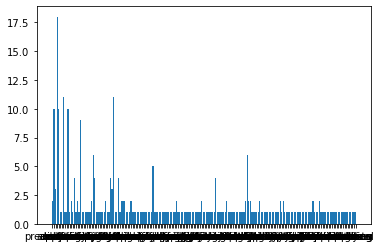

In [81]:
names = list(word_freq.keys())
values = list(word_freq.values())
plt.bar(range(len(word_freq)), values, tick_label=names)
plt.show()

- c. What is the probability of the word “analytics” occurring after the word “data” ?

In [76]:
data_analytics_prob = new_text.count('data analytics')/new_text.count('data')

In [77]:
data_analytics_prob

0.3333333333333333